**Objective:** Perform a geographical analysis of the
restaurants in the dataset.

**Steps:**

* Explore the latitude and longitude coordinates of
the restaurants and visualize their distribution on a
map.
* Group the restaurants by city or locality and
analyze the concentration of restaurants in
different areas.
* Calculate statistics such as the average ratings,
cuisines, or price ranges by city or locality.
* Identify any interesting insights or patterns related
to the locations of the restaurants.

### Libraries and Data Loading

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import geopandas as gpd

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
from geopy.geocoders import Nominatim
from shapely.geometry import Point


In [7]:
pip install geopy


  Obtaining dependency information for geopy from https://files.pythonhosted.org/packages/e5/15/cf2a69ade4b194aa524ac75112d5caac37414b20a3a03e6865dfe0bd1539/geopy-2.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for geographiclib<3,>=1.52 from https://files.pythonhosted.org/packages/9f/5a/a26132406f1f40cf51ea349a5f11b0a46cec02a2031ff82e391c2537247a/geographiclib-2.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   -------------------------- ------------- 81.9/125.4 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 125.4/125.4 kB 1.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
   ---------------------------------------- 40.3/40.3 kB ? eta 0:00:00


In [4]:
pip install geopandas

  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/3e/b0/69fa7a0f55122847506a42fea6988d03b34136938082f142151bc9d9f7e7/geopandas-0.14.4-py3-none-any.whl.metadata
  Obtaining dependency information for fiona>=1.8.21 from https://files.pythonhosted.org/packages/7f/ba/f40c12e2a6b4a106ab16b1adfee2bf0aa6c27aaa72f928bf52b71734f9d8/fiona-1.9.6-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/51.5 kB ? eta -:--:--
     ------- -------------------------------- 10.2/51.5 kB ? eta -:--:--
     -------------------------------------- 51.5/51.5 kB 655.5 kB/s eta 0:00:00
  Obtaining dependency information for pyproj>=3.3.0 from https://files.pythonhosted.org/packages/79/95/eb68113c5b5737c342bde1bab92705dabe69c16299c5a122616e50f1fbd6/pyproj-3.6.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for shapely>=1.8.0 from https://files.pythonhosted.org/packages/6a/5c/3330f499ca860f0b92db4ceaebd7090096a83c1ea

In [2]:
pip install folium


  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/b9/98/9ba4b9d2d07dd32765ddb4e4c189dcbdd7dca4d5a735e2e4ea756f40c36b/folium-0.16.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for branca>=0.6.0 from https://files.pythonhosted.org/packages/75/ca/6074ab4a04dd1a503201c18091b3426f3709670115fae316907a97f98d75/branca-0.7.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/100.0 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/100.0 kB ? eta -:--:--
   ---------------------------------------- 100.0/100.0 kB 1.4 MB/s eta 0:00:00


In [9]:
# load dataframe
df = pd.read_csv("C:/Users/DELL/Desktop/cognifyz/Task-4/Dataset .csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


### Distribution of restaurants on the map (longitude and latitude)

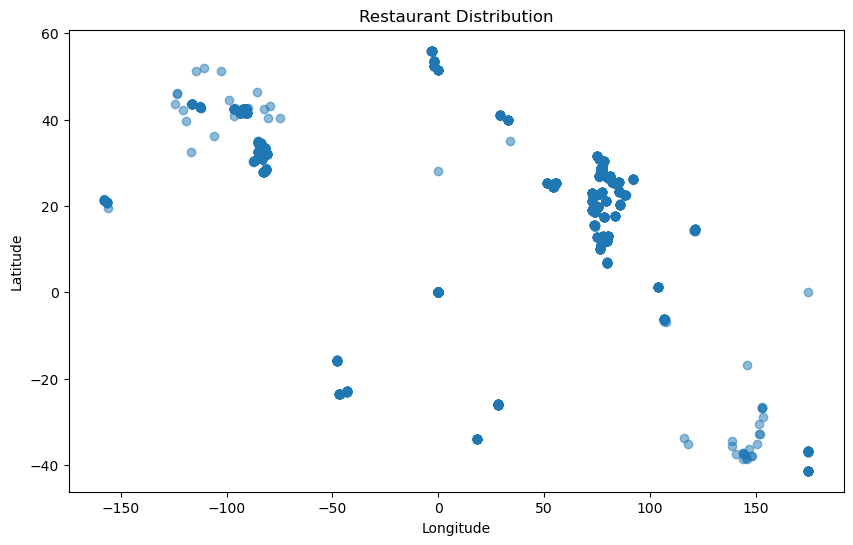

In [10]:
# Check if "Latitude" and "Longitude" columns exist
if "Latitude" in df.columns and "Longitude" in df.columns:
    # Scatter plot of restaurants' geographical distribution
    plt.figure(figsize=(10, 6))
    plt.scatter(df["Longitude"], df["Latitude"], alpha=0.5)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("Restaurant Distribution")
    plt.show()
    
    # Check if a column for region or area is available
    if "Region" in df.columns:
        # Grouping restaurants by region and counting the number of restaurants in each region
        region_counts = df["Region"].value_counts()

        # Plotting a bar graph of restaurant counts by region
        plt.figure(figsize=(10, 6))
        region_counts.plot(kind='bar', color='skyblue')
        plt.xlabel("Region")
        plt.ylabel("Number of Restaurants")
        plt.title("Restaurant Counts by Region")
        plt.xticks(rotation=45)
        plt.show()
        
        # Choropleth map showing restaurant density by region (if shapefile available)
        world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
        world = world[(world.pop_est>0) & (world.name!="Antarctica")]

        region_geo = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
        region_counts = df['Region'].value_counts().reset_index()
        region_counts.columns = ['name', 'count']
        merged = world.merge(region_counts, how='left', left_on='name', right_on='name')
        merged.fillna(0, inplace=True)

        fig, ax = plt.subplots(1, 1, figsize=(10, 6))
        merged.plot(column='count', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
        plt.title('Restaurant Density by Region')
        plt.axis('off')
        plt.show()
else:
    print("Latitude and longitude columns not found.")


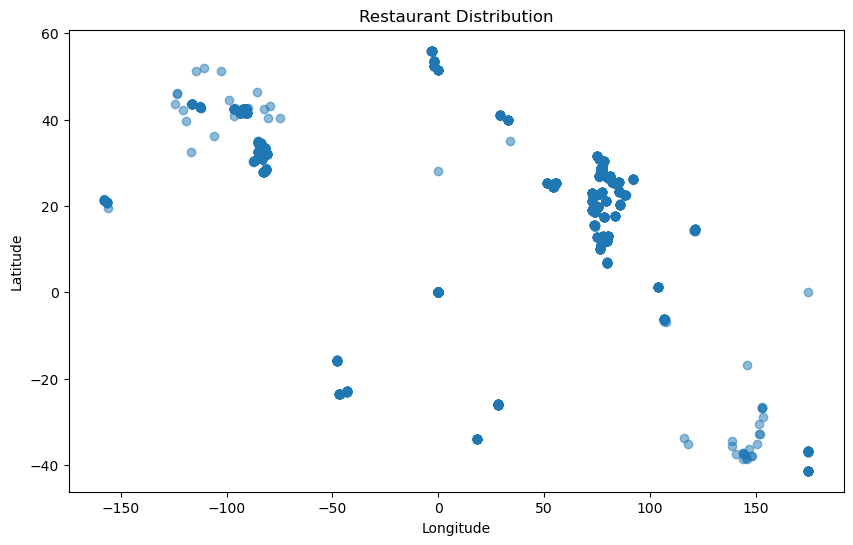

In [11]:
# Load the restaurant dataset into a GeoDataFrame
restaurants_gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']))

# Check if "Latitude" and "Longitude" columns exist
if "Latitude" in df.columns and "Longitude" in df.columns:
    # Scatter plot of restaurants' geographical distribution
    plt.figure(figsize=(10, 6))
    plt.scatter(df["Longitude"], df["Latitude"], alpha=0.5)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("Restaurant Distribution")
    plt.show()
    
    # Create a map centered around the mean latitude and longitude of the restaurant locations
    map_restaurants = folium.Map(location=[restaurants_gdf['geometry'].y.mean(), restaurants_gdf['geometry'].x.mean()], zoom_start=12)
    restaurants_gdf.crs = 'EPSG:4326'
    folium.GeoJson(restaurants_gdf).add_to(map_restaurants)
    
    # Display the map
    map_restaurants
else:
    print("Latitude and longitude columns not found.")


### Analysing the concentration of restaurants by city/location

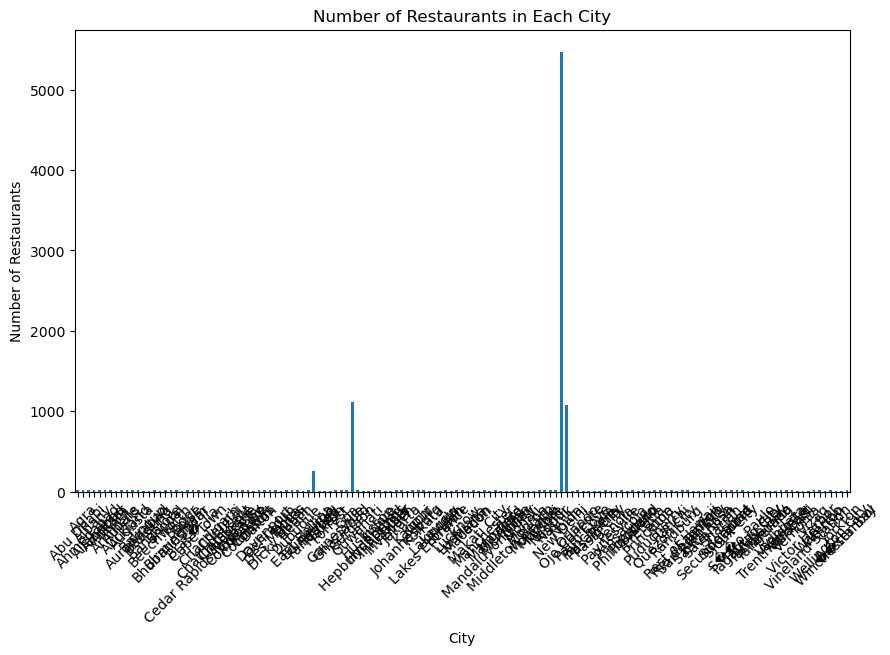

In [12]:
grouped_by_city = df.groupby('City')
restaurant_counts = grouped_by_city.size()

# Plotting the restaurant counts by city
restaurant_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Restaurants in Each City')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()


In [13]:
#the above graph is too dense to be visible.
#inspect number of cities
df['City'].nunique()

141

In [14]:
df1 = df.copy()

In [15]:
# There are 141 cities in the dataset. It will be difficult to analyse all of them.
# We will filter out top 20 cities with highest number of restaurants.
city_count = dict(df1['City'].value_counts().sort_values(ascending=False)[:20])
print(city_count)

{'New Delhi': 5473, 'Gurgaon': 1118, 'Noida': 1080, 'Faridabad': 251, 'Ghaziabad': 25, 'Bhubaneshwar': 21, 'Amritsar': 21, 'Ahmedabad': 21, 'Guwahati': 21, 'Lucknow': 21, 'Cape Town': 20, 'Bras�_lia': 20, 'Rio de Janeiro': 20, 'S��o Paulo': 20, 'Albany': 20, 'Athens': 20, 'Augusta': 20, 'Manchester': 20, 'Boise': 20, 'Cedar Rapids/Iowa City': 20}


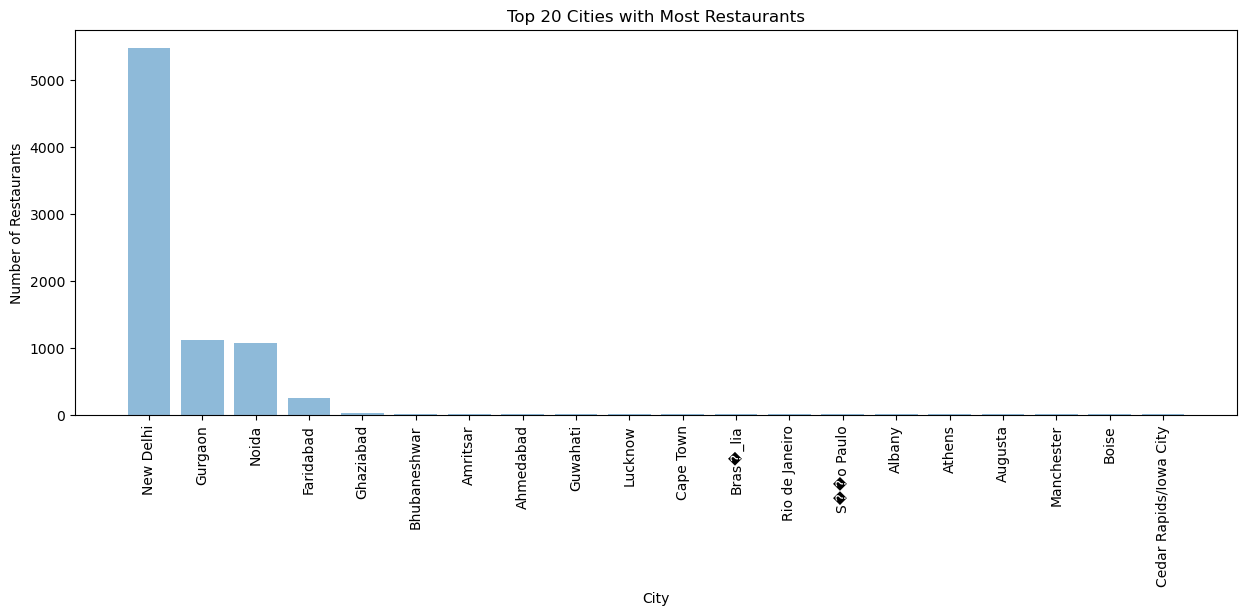

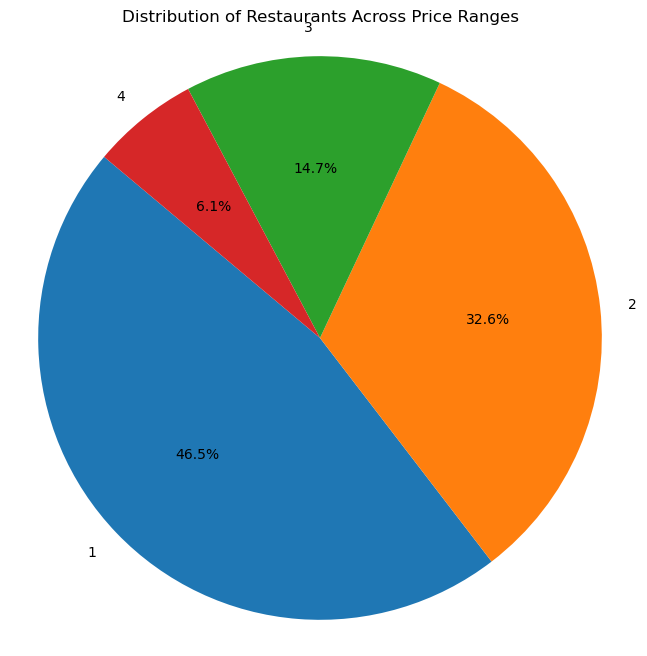

In [16]:
# Plot a bar chart of the top 20 cities with the most restaurants
cities = list(city_count.keys())
counts = list(city_count.values())
y_pos = np.arange(len(cities))

plt.figure(figsize=(15, 5))
plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos, cities, rotation=90)
plt.xlabel("City")
plt.ylabel("Number of Restaurants")
plt.title("Top 20 Cities with Most Restaurants")
plt.show()

# Plot a pie chart of the distribution of restaurants across different price ranges
price_ranges = df['Price range'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(price_ranges, labels=price_ranges.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Restaurants Across Price Ranges")
plt.axis('equal')
plt.show()


In [18]:
from tabulate import tabulate

locality_count = dict(df1['Address'].value_counts().sort_values(ascending=False)[:20])
table_data = [(locality, count) for locality, count in locality_count.items()]
print(tabulate(table_data, headers=["Locality", "Count"], tablefmt="grid"))


+----------------------------------------------------------------------------+---------+
| Locality                                                                   |   Count |
+============================================================================+=========+
| Dilli Haat, INA, New Delhi                                                 |      11 |
+----------------------------------------------------------------------------+---------+
| Sector 41, Noida                                                           |      11 |
+----------------------------------------------------------------------------+---------+
| Greater Kailash (GK) 1, New Delhi                                          |      10 |
+----------------------------------------------------------------------------+---------+
| The Imperial, Janpath, New Delhi                                           |       9 |
+----------------------------------------------------------------------------+---------+
| Cyber Hub, DLF Cybe

In [19]:
from tabulate import tabulate

country_count = dict(df1['Country Code'].value_counts().sort_values(ascending=False)[:20])
table_data = [(country_code, count) for country_code, count in country_count.items()]
print(tabulate(table_data, headers=["Country Code", "Count"], tablefmt="grid"))


+----------------+---------+
|   Country Code |   Count |
+================+=========+
|              1 |    8652 |
+----------------+---------+
|            216 |     434 |
+----------------+---------+
|            215 |      80 |
+----------------+---------+
|             30 |      60 |
+----------------+---------+
|            214 |      60 |
+----------------+---------+
|            189 |      60 |
+----------------+---------+
|            148 |      40 |
+----------------+---------+
|            208 |      34 |
+----------------+---------+
|             14 |      24 |
+----------------+---------+
|            162 |      22 |
+----------------+---------+
|             94 |      21 |
+----------------+---------+
|            184 |      20 |
+----------------+---------+
|            166 |      20 |
+----------------+---------+
|            191 |      20 |
+----------------+---------+
|             37 |       4 |
+----------------+---------+


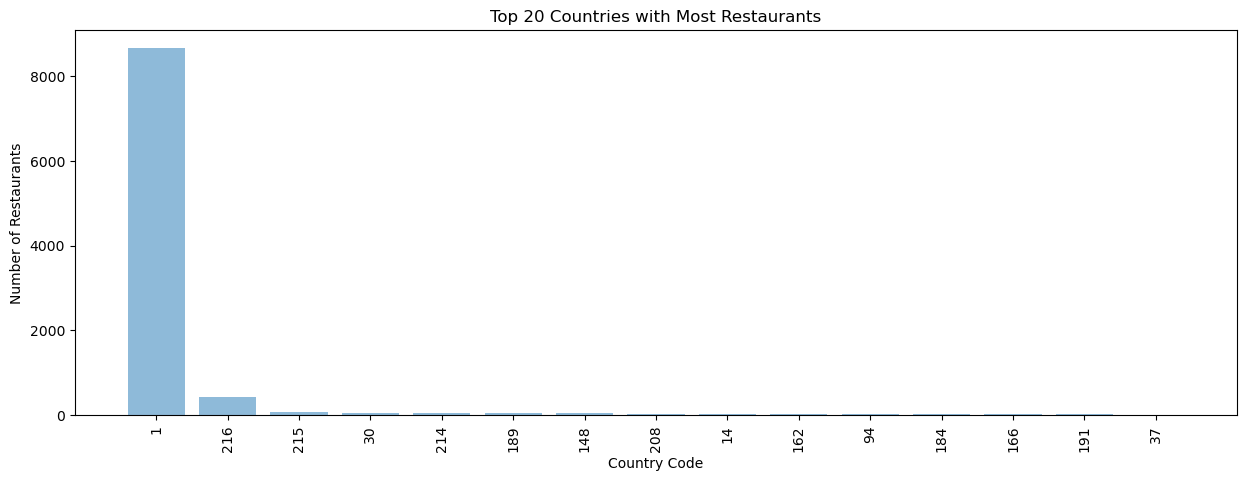

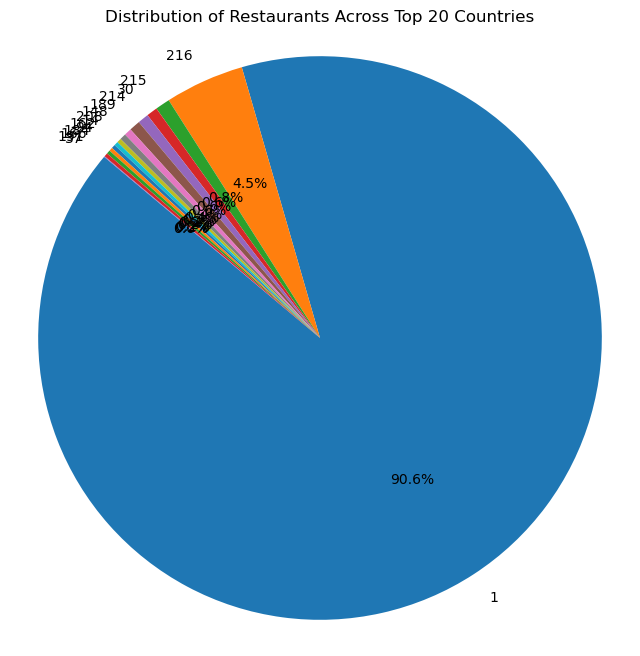

In [20]:
# Bar chart of the top 20 countries with the most restaurants
cities = list(country_count.keys())
counts = list(country_count.values())
y_pos = np.arange(len(cities))

plt.figure(figsize=(15, 5))
plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos, cities, rotation=90)
plt.xlabel("Country Code")
plt.ylabel("Number of Restaurants")
plt.title("Top 20 Countries with Most Restaurants")
plt.show()

# Pie chart of the distribution of restaurants across the top 20 countries
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=cities, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Restaurants Across Top 20 Countries")
plt.axis('equal')
plt.show()


### Calculating statistics such as the average ratings, cuisines, or price ranges by city or locality

In [21]:
from tabulate import tabulate

city_count = dict(df1['City'].value_counts().sort_values(ascending=False)[:20])
table_data = [(city, count) for city, count in city_count.items()]
print(tabulate(table_data, headers=["City", "Count"], tablefmt="grid"))


+------------------------+---------+
| City                   |   Count |
+========================+=========+
| New Delhi              |    5473 |
+------------------------+---------+
| Gurgaon                |    1118 |
+------------------------+---------+
| Noida                  |    1080 |
+------------------------+---------+
| Faridabad              |     251 |
+------------------------+---------+
| Ghaziabad              |      25 |
+------------------------+---------+
| Bhubaneshwar           |      21 |
+------------------------+---------+
| Amritsar               |      21 |
+------------------------+---------+
| Ahmedabad              |      21 |
+------------------------+---------+
| Guwahati               |      21 |
+------------------------+---------+
| Lucknow                |      21 |
+------------------------+---------+
| Cape Town              |      20 |
+------------------------+---------+
| Bras�_lia              |      20 |
+------------------------+---------+
|

+------------------------+------------------+
| City                   |   Average Rating |
+========================+==================+
| Rio de Janeiro         |          4.265   |
+------------------------+------------------+
| Boise                  |          4.26    |
+------------------------+------------------+
| Athens                 |          4.2     |
+------------------------+------------------+
| Lucknow                |          4.19524 |
+------------------------+------------------+
| Guwahati               |          4.19048 |
+------------------------+------------------+
| Cedar Rapids/Iowa City |          4.165   |
+------------------------+------------------+
| Ahmedabad              |          4.1619  |
+------------------------+------------------+
| Augusta                |          4.13    |
+------------------------+------------------+
| Cape Town              |          4.11    |
+------------------------+------------------+
| Manchester             |        

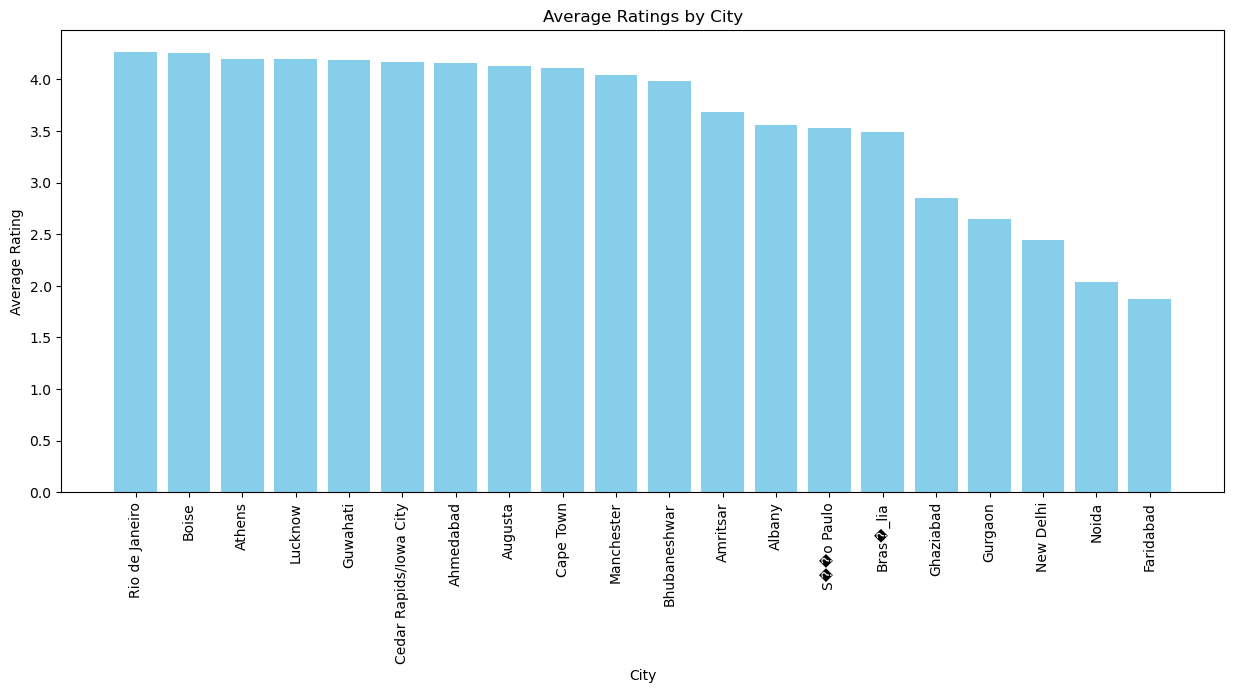

In [22]:
from tabulate import tabulate

# Calculate average ratings by city
average_ratings_by_city = {}
for city, count in city_count.items():
    city_df = df[df['City'] == city]
    average_rating = city_df['Aggregate rating'].mean()
    average_ratings_by_city[city] = average_rating

# Sort cities by average rating in descending order
sorted_average_ratings = {k: v for k, v in sorted(average_ratings_by_city.items(), key=lambda item: item[1], reverse=True)}

# Print average ratings by city in table format
table_data = [(city, average_rating) for city, average_rating in sorted_average_ratings.items()]
print(tabulate(table_data, headers=["City", "Average Rating"], tablefmt="grid"))

# Draw a bar graph for average ratings by city
cities = list(sorted_average_ratings.keys())
ratings = list(sorted_average_ratings.values())

plt.figure(figsize=(15, 6))
plt.bar(cities, ratings, color='skyblue')
plt.xlabel("City")
plt.ylabel("Average Rating")
plt.title("Average Ratings by City")
plt.xticks(rotation=90)
plt.show()


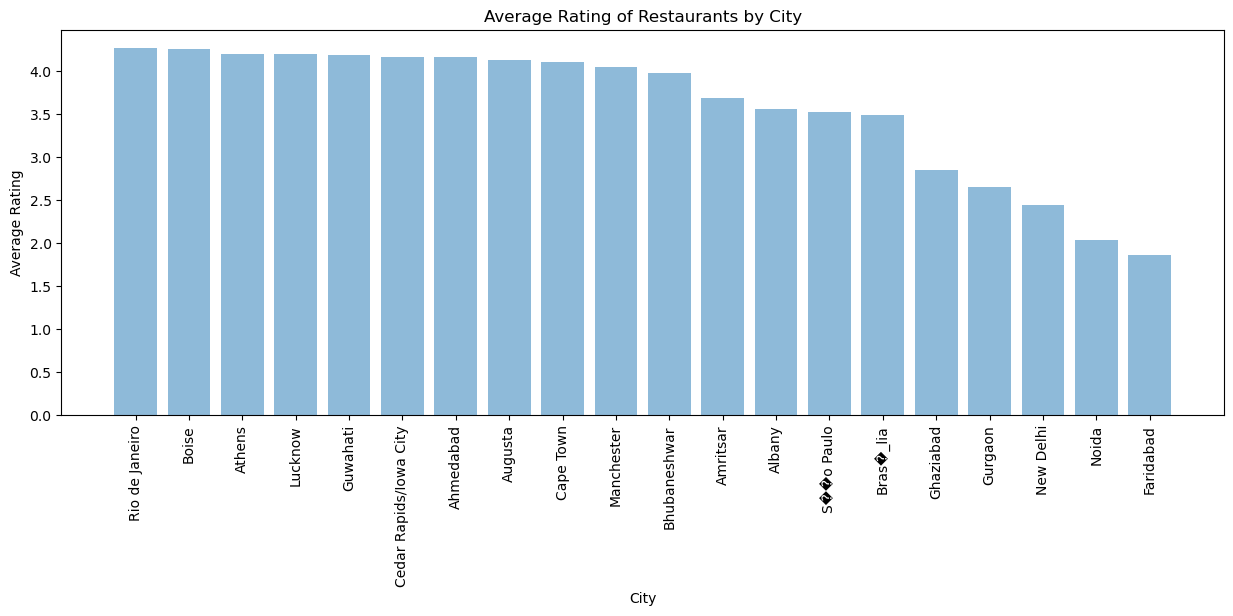

In [23]:
# plot a bar chart of average ratings of top 20 cities
cities = list(sorted_average_ratings.keys())
average_ratings = list(sorted_average_ratings.values())
y_pos = np.arange(len(cities))

plt.figure(figsize=(15, 5))
plt.bar(y_pos, average_ratings, align='center', alpha=0.5)
plt.xticks(y_pos, cities, rotation=90)
plt.xlabel("City")
plt.ylabel("Average Rating")
plt.title("Average Rating of Restaurants by City")
plt.show()


In [24]:
from tabulate import tabulate

# Create a sorted dictionary of cuisines and their frequencies
cuisines = df['Cuisines'].str.split(',').explode().value_counts().sort_values(ascending=False).to_dict()

# Convert the dictionary to a list of tuples for tabulate
table_data = [(cuisine, frequency) for cuisine, frequency in cuisines.items()]

# Print the table
print(tabulate(table_data, headers=["Cuisine", "Frequency"], tablefmt="grid"))


+-------------------+-------------+
| Cuisine           |   Frequency |
+===================+=============+
| North Indian      |        2992 |
+-------------------+-------------+
| Chinese           |        1880 |
+-------------------+-------------+
| Fast Food         |        1314 |
+-------------------+-------------+
| North Indian      |         968 |
+-------------------+-------------+
| Chinese           |         855 |
+-------------------+-------------+
| Mughlai           |         780 |
+-------------------+-------------+
| Fast Food         |         672 |
+-------------------+-------------+
| Bakery            |         621 |
+-------------------+-------------+
| Cafe              |         617 |
+-------------------+-------------+
| Italian           |         530 |
+-------------------+-------------+
| Desserts          |         503 |
+-------------------+-------------+
| Continental       |         501 |
+-------------------+-------------+
| South Indian      |       

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


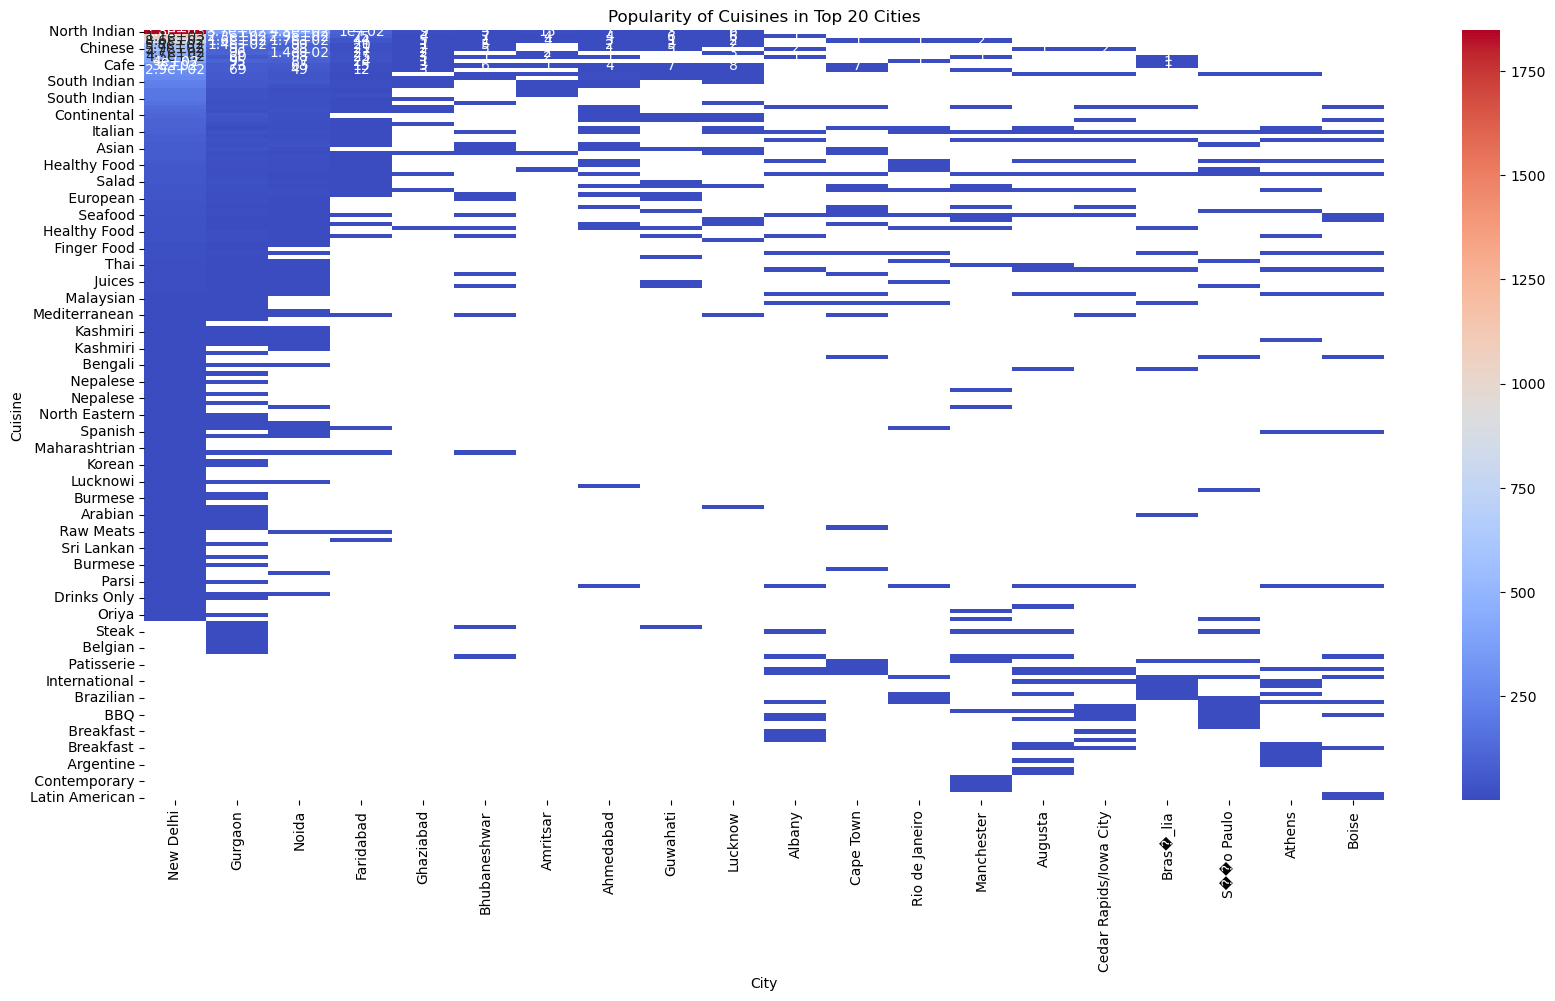

Cuisine Popularity:
                New Delhi  Gurgaon  Noida  Faridabad  Ghaziabad  Bhubaneshwar  \
North Indian       1848.0    367.0  433.0      102.0        9.0           5.0   
 Chinese           1069.0    231.0  286.0       75.0        4.0           7.0   
 Fast Food          858.0    160.0  167.0       44.0        5.0           1.0   
 North Indian       577.0    141.0   99.0       20.0        1.0           5.0   
Chinese             569.0     93.0   98.0       21.0        2.0           5.0   
...                   ...      ...    ...        ...        ...           ...   
 Contemporary         NaN      NaN    NaN        NaN        NaN           NaN   
Pakistani             NaN      NaN    NaN        NaN        NaN           NaN   
Argentine             NaN      NaN    NaN        NaN        NaN           NaN   
 Teriyaki             NaN      NaN    NaN        NaN        NaN           NaN   
Latin American        NaN      NaN    NaN        NaN        NaN           NaN   

       

In [26]:
import seaborn as sns

# Create a dictionary to store cuisine popularity
cuisine_popularity = {}
for city in city_count:
    city_df = df[df['City'] == city]
    city_cuisines = city_df['Cuisines'].str.split(',').explode().value_counts().to_dict()
    for cuisine, count in city_cuisines.items():
        if cuisine not in cuisine_popularity:
            cuisine_popularity[cuisine] = {}
        cuisine_popularity[cuisine][city] = count

# Convert cuisine popularity dictionary to DataFrame
cuisine_popularity_df = pd.DataFrame(cuisine_popularity).transpose()

# Plot the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(cuisine_popularity_df, cmap='coolwarm', annot=True)
plt.xlabel("City")
plt.ylabel("Cuisine")
plt.title("Popularity of Cuisines in Top 20 Cities")
plt.show()

# Print cuisine popularity DataFrame
print("Cuisine Popularity:")
print(cuisine_popularity_df)


In [27]:
from tabulate import tabulate

# Calculate average price by city
average_price_by_city = {}
for city, count in city_count.items():
    city_df = df[df['City'] == city]
    average_price = city_df['Price range'].mean()
    average_price_by_city[city] = average_price

# Sort cities by average price in descending order
sorted_average_price = {k: v for k, v in sorted(average_price_by_city.items(), key=lambda item: item[1], reverse=True)}

# Print average price by city in table format
table_data = [(city, average_price) for city, average_price in sorted_average_price.items()]
print(tabulate(table_data, headers=["City", "Average Price"], tablefmt="grid"))


+------------------------+-----------------+
| City                   |   Average Price |
+========================+=================+
| S��o Paulo             |         3.6     |
+------------------------+-----------------+
| Rio de Janeiro         |         3.5     |
+------------------------+-----------------+
| Cape Town              |         3.2     |
+------------------------+-----------------+
| Bras�_lia              |         3.1     |
+------------------------+-----------------+
| Manchester             |         2.7     |
+------------------------+-----------------+
| Ahmedabad              |         2.57143 |
+------------------------+-----------------+
| Lucknow                |         2.57143 |
+------------------------+-----------------+
| Guwahati               |         2.52381 |
+------------------------+-----------------+
| Augusta                |         2.15    |
+------------------------+-----------------+
| Boise                  |         2.05    |
+---------

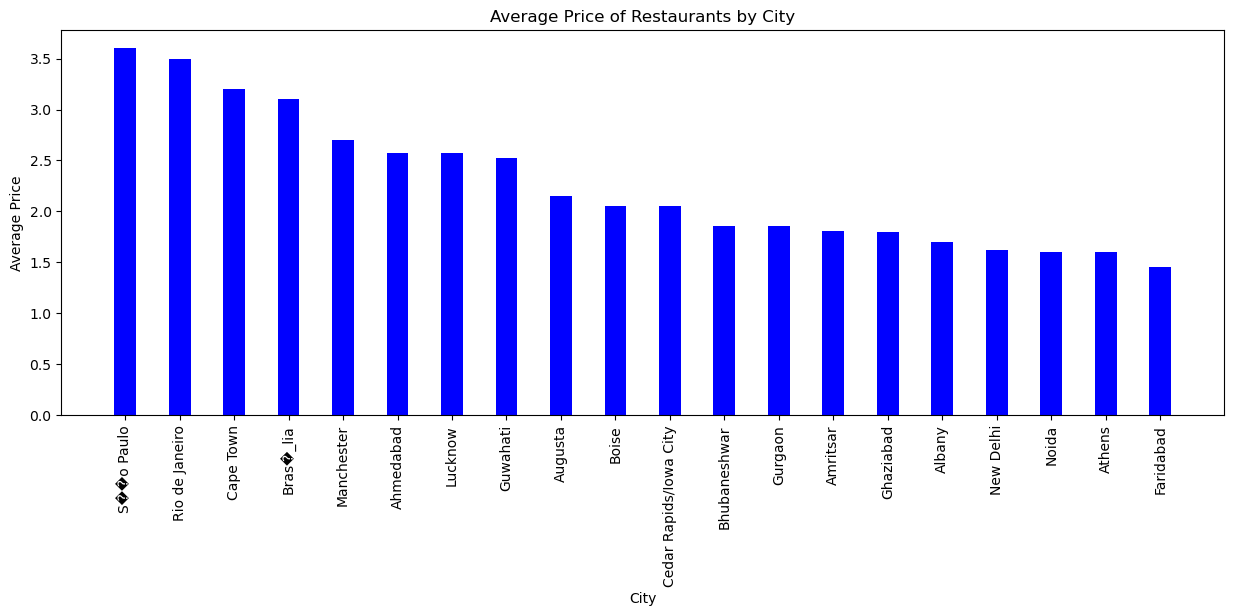

In [28]:
cities = list(sorted_average_price.keys())
average_price = list(sorted_average_price.values())

plt.figure(figsize=(15, 5))
plt.bar(cities, average_price, color='blue', width=0.4)

plt.xlabel("City")
plt.ylabel("Average Price")
plt.title("Average Price of Restaurants by City")

plt.xticks(rotation=90)
plt.show()


Conclusion : 

Utilized Folium and Geopanda libraries to visualize the geographical distribution of restaurants based on their coordinates.
New Delhi stands out as the city boasting the highest number of restaurants, reaching a staggering 5473, 
closely followed by Gurgaon and Noida.
Dilli Haat in INA, New Delhi emerges as the locality with the highest restaurant density. 
On a broader scale, it appears that country code "1", likely representing North America, leads in terms of restaurant abundance.
Rio de Janeiro and Boise exhibit the highest average restaurant ratings of 4.3 among the top 20 cities with the most restaurants.
'North Indian' cuisine reigns supreme as the most popular overall, closely trailed by 'Chinese' and 'Fast Food'.
Within the top 20 cities with the most restaurants, S��o Paulo and Rio de Janeiro boast the most upscale dining establishments, 
with the highest average prices.